In [1]:
#Load and read data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("sales_data.csv")
print("Original DataFrame:")
print(df)
print("\nDataFrame Info:")
print(df.info())

Original DataFrame:
   transaction_id product     category   price  quantity region   sale_date
0               1   Phone  Electronics   500.0         2  North  2025-01-01
1               2  Laptop  Electronics  1200.0         1  South  2025-01-02
2               3   Shirt     Clothing    30.0         5  North  2025-01-03
3               4   Phone  Electronics   500.0         3   West  2025-01-04
4               5  Jacket     Clothing     NaN         2   East  2025-01-05
5               6  Laptop  Electronics  1200.0         1  North  2025-01-06
6               7   Shoes     Clothing    80.0         4  South  2025-01-07
7               8   Phone  Electronics   500.0         1   West  2025-01-08
8               9   Shirt     Clothing    30.0         6   East  2025-01-09
9              10  Laptop  Electronics  1200.0         2  South  2025-01-10

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column          Non-N

In [2]:
# Fill missing 'price' values with the mean price for each category
df["price"] = df.groupby("category")["price"].transform(lambda x: x.fillna(x.mean()))
print("\nAfter Filling Missing Prices:")
print(df)


After Filling Missing Prices:
   transaction_id product     category        price  quantity region  \
0               1   Phone  Electronics   500.000000         2  North   
1               2  Laptop  Electronics  1200.000000         1  South   
2               3   Shirt     Clothing    30.000000         5  North   
3               4   Phone  Electronics   500.000000         3   West   
4               5  Jacket     Clothing    46.666667         2   East   
5               6  Laptop  Electronics  1200.000000         1  North   
6               7   Shoes     Clothing    80.000000         4  South   
7               8   Phone  Electronics   500.000000         1   West   
8               9   Shirt     Clothing    30.000000         6   East   
9              10  Laptop  Electronics  1200.000000         2  South   

    sale_date  
0  2025-01-01  
1  2025-01-02  
2  2025-01-03  
3  2025-01-04  
4  2025-01-05  
5  2025-01-06  
6  2025-01-07  
7  2025-01-08  
8  2025-01-09  
9  2025-01-10  


In [3]:
# Add a new column for total sales (price * quantity)
df["total_sales"] = df["price"] * df["quantity"]
print("\nAfter Adding Total Sales Column:")
print(df)


After Adding Total Sales Column:
   transaction_id product     category        price  quantity region  \
0               1   Phone  Electronics   500.000000         2  North   
1               2  Laptop  Electronics  1200.000000         1  South   
2               3   Shirt     Clothing    30.000000         5  North   
3               4   Phone  Electronics   500.000000         3   West   
4               5  Jacket     Clothing    46.666667         2   East   
5               6  Laptop  Electronics  1200.000000         1  North   
6               7   Shoes     Clothing    80.000000         4  South   
7               8   Phone  Electronics   500.000000         1   West   
8               9   Shirt     Clothing    30.000000         6   East   
9              10  Laptop  Electronics  1200.000000         2  South   

    sale_date  total_sales  
0  2025-01-01  1000.000000  
1  2025-01-02  1200.000000  
2  2025-01-03   150.000000  
3  2025-01-04  1500.000000  
4  2025-01-05    93.333333  

In [4]:
#Filter data (e.g., sales in the North region)
north_sales = df[df["region"] == "North"]
print("\nNorth Region Sales:")
print(north_sales)


North Region Sales:
   transaction_id product     category   price  quantity region   sale_date  \
0               1   Phone  Electronics   500.0         2  North  2025-01-01   
2               3   Shirt     Clothing    30.0         5  North  2025-01-03   
5               6  Laptop  Electronics  1200.0         1  North  2025-01-06   

   total_sales  
0       1000.0  
2        150.0  
5       1200.0  


In [5]:
# Group by category and compute summary statistics
category_summary = df.groupby("category").agg({
    "total_sales": ["sum", "mean"],
    "quantity": "sum"
})
print("\nCategory Summary:")
print(category_summary)


Category Summary:
             total_sales              quantity
                     sum         mean      sum
category                                      
Clothing      743.333333   185.833333       17
Electronics  7800.000000  1300.000000       10


In [6]:
# normalize total_sales
total_sales_array = np.array(df["total_sales"])
normalized_sales = (total_sales_array - total_sales_array.min()) / (total_sales_array.max() - total_sales_array.min())
df["normalized_sales"] = normalized_sales
print("\nAfter Normalizing Total Sales:")
print(df)


After Normalizing Total Sales:
   transaction_id product     category        price  quantity region  \
0               1   Phone  Electronics   500.000000         2  North   
1               2  Laptop  Electronics  1200.000000         1  South   
2               3   Shirt     Clothing    30.000000         5  North   
3               4   Phone  Electronics   500.000000         3   West   
4               5  Jacket     Clothing    46.666667         2   East   
5               6  Laptop  Electronics  1200.000000         1  North   
6               7   Shoes     Clothing    80.000000         4  South   
7               8   Phone  Electronics   500.000000         1   West   
8               9   Shirt     Clothing    30.000000         6   East   
9              10  Laptop  Electronics  1200.000000         2  South   

    sale_date  total_sales  normalized_sales  
0  2025-01-01  1000.000000          0.393064  
1  2025-01-02  1200.000000          0.479769  
2  2025-01-03   150.000000        

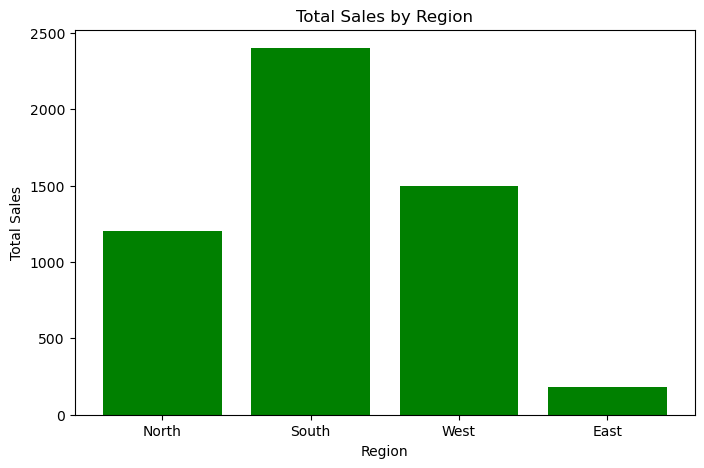

In [7]:
# Visualize total sales by region
plt.figure(figsize=(8, 5))
plt.bar(df["region"], df["total_sales"], color="green")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.title("Total Sales by Region")
plt.show()

In [8]:
df.to_csv("sales_data_processed.csv", index=False)
print("Processed data saved to 'sales_data_processed.csv'")

Processed data saved to 'sales_data_processed.csv'
